# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Import Data

In [2]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-04-07 - NBA Game Analysis\Data'

In [3]:
# import wrangled games data
df_games = pd.read_csv(os.path.join(path, 'games_wrangeled.csv'), index_col = False)

In [4]:
df_games.columns

Index(['Unnamed: 0', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON',
       'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'HOME_TEAM_NAME', 'HOME_CITY', 'AWAY_TEAM_NAME',
       'AWAY_CITY', 'HOME_STATE_FULL', 'AWAY_STATE_FULL'],
      dtype='object')

# 03. Visual Analysis

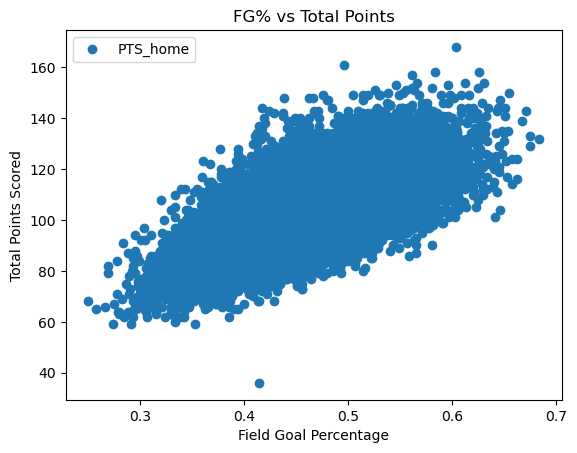

In [9]:
# Create a scatterplot showing hte relationship between FG% and Total Points
df_games.plot(x = 'FG_PCT_home', y = 'PTS_home', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('FG% vs Total Points')  
plt.xlabel('Field Goal Percentage')  
plt.ylabel('Total Points Scored')  
plt.show()

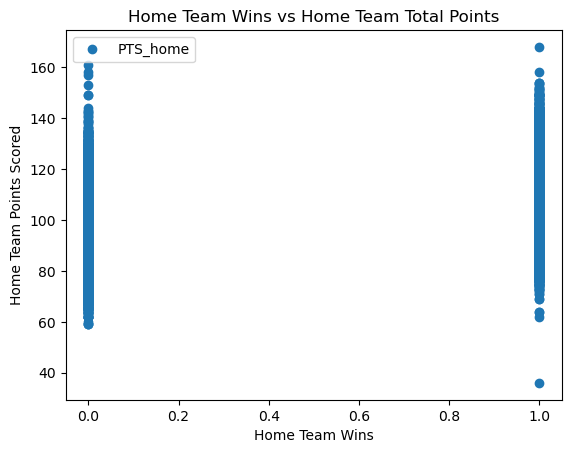

In [10]:
# Create a scatterplot showing hte relationship between Total Points & Wins
df_games.plot(x = 'HOME_TEAM_WINS', y = 'PTS_home', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Home Team Wins vs Home Team Total Points')  
plt.xlabel('Home Team Wins')  
plt.ylabel('Home Team Points Scored')  
plt.show()

### Hypothesis: Higher FG% leads to higher total team score, which in turn leads to more wins.

# 04. Data Prep for Regression Analysis

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_games['FG_PCT_home'].values.reshape(-1,1)
y = df_games['PTS_home'].values.reshape(-1,1)

In [12]:
X

array([[0.484],
       [0.488],
       [0.482],
       ...,
       [0.448],
       [0.44 ],
       [0.431]])

In [13]:
y

array([[126.],
       [120.],
       [114.],
       ...,
       [ 98.],
       [ 99.],
       [ 86.]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

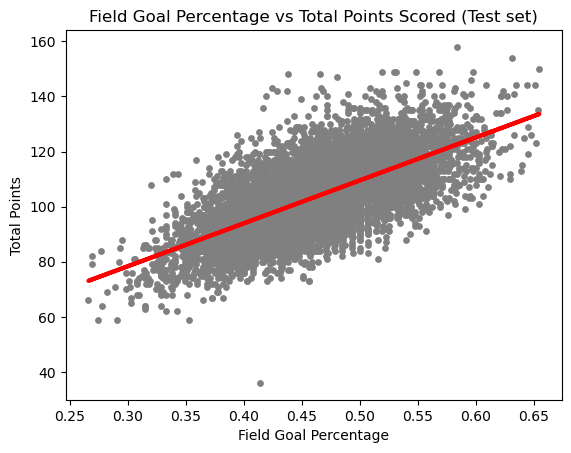

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Field Goal Percentage vs Total Points Scored (Test set)')
plot_test.xlabel('Field Goal Percentage')
plot_test.ylabel('Total Points')
plot_test.show()

### The line looks good in my opinion, seems to fit teh data properly. 

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[155.73855931]]
Mean squared error:  100.16021789486243
R2 score:  0.4329412570996699


In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,115.0,107.024873
1,98.0,99.860900
2,97.0,96.901867
3,119.0,99.393684
4,136.0,96.590390
5,95.0,97.680560
6,122.0,114.967540
7,94.0,85.532952
8,94.0,90.672325
9,114.0,100.483854


### Seems like the model didnt perform as well as i thought. The MSE was very high and the R2 score wasn't high enough.
### This leads me to say that the model is over simplified, FG% alone can't be the only variable that influences total points scored. I will probably have to add other variables to the model for it to be more complete. 